<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day4_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Two components:
# - Hidden layer: convolution + pooling for feature extraction
# - Classification (same as what we did on day 3)

# Pooling: downsamples our images or feature maps to satisfy computational resources limitation (memory saving step).

In [2]:
#  Today's dataset: CIFAR-10

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# Load input images and output labels
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
## Preparing data

# Use only 10% of the dataset (n of 5000)
n = 50000
X_train = X_train[:n]
y_train = y_train[:n]

# Normalise images to grayscale
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Features of interest (outputs)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

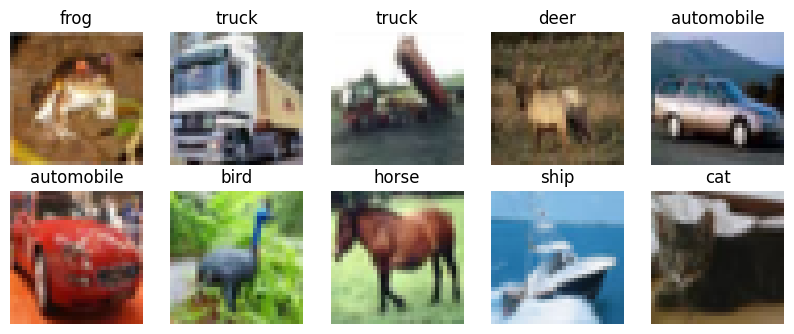

In [7]:
plt.figure(figsize=(10,10))

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap = plt.cm.binary)
  plt.axis('off')
  plt.title(class_names[y_train[i,0]])

plt.show()

In [8]:
dim = X_train.shape
dim

(50000, 32, 32, 3)

In [9]:
def create_CNN_model():
  inputs = keras.Input(shape=X_train.shape[1:])

  # Encoding mechanism (note: 2 layers here is still shallow)
  conv1 = keras.layers.Conv2D(50, (3,3), activation='relu')(inputs)   # 50 is the number of convolution kernels (number of feature maps to extract), 3x3 is the patch we want to scan the kernel., depends if we want granular or big-picture extraction.
  pool1 = keras.layers.MaxPooling2D((2,2))(conv1)   # max pooling is the maximum value of 2x2 matrix/region, down-sampled or represented as the max value. not as good as averagepooling.
  conv2 = keras.layers.Conv2D(50, (3,3), activation='relu')(pool1)
  pool2 = keras.layers.MaxPooling2D((2,2))(conv2)

  # We cannot determine a priori which feature maps are relevant.

  # Decoding mechanism (class probability extractor)
  flattened = keras.layers.Flatten()(pool2)
  dense1 = keras.layers.Dense(50, activation='relu')(flattened)
  outputs = keras.layers.Dense(10, activation='softmax')(dense1)

  model = keras.Model(inputs=inputs, outputs=outputs, name='ConvNN')

  return model

In [10]:
model = create_CNN_model()
model.summary()

Model: "ConvNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1800)              0    

In [11]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 8ms/step - loss: 1.5067 - accuracy: 0.4580
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1626 - accuracy: 0.5931
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0353 - accuracy: 0.6395
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9563 - accuracy: 0.6666
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8954 - accuracy: 0.6886
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8495 - accuracy: 0.7056
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8142 - accuracy: 0.7148
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7720 - accuracy: 0.7313
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7430 - accuracy: 0.7409
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.71

In [12]:
scores = model.evaluate(X_test, y_test)
print(scores)

313/313 [==============================] - 1s 3ms/step - loss: 0.9141 - accuracy: 0.6923
[0.9140777587890625, 0.692300021648407]


##**Compare to Random Forest**

In [13]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import plot_tree
# from sklearn.metrics import accuracy_score

# import tensorflow
# from tensorflow import keras

# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# x_train = x_train[:5000]
# y_train = y_train[:5000]
# x_test = x_test[:10000]
# y_test = y_test[:10000]

# x_train = x_train/255
# x_test = x_test/255

# # Change for 1D array (note that deep learning uses 2D array)
# y_train2 = y_train.ravel()
# y_test2 = y_test.ravel()

# # Define our model
# # extra parameter called n_estimators which is number of trees in the forest
# # a leaf is a class label at the end of the decision tree
# forest = RandomForestClassifier()

# # train our model
# #sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
# nsamples, nx, ny, nrgb = x_train.shape
# x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

# nsamples, nx, ny, nrgb = x_test.shape
# x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

# forest.fit(x_train2, y_train2)
# forest_preds = forest.predict(x_test2)

# acc_forest = accuracy_score(y_test2, forest_preds)
# print("RF acc: ", acc_forest)

## **Tuning HPs of CNNs**



In [14]:
# Split data into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=True)

X_train.shape, X_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [15]:
# Train model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6866 - accuracy: 0.7610 - val_loss: 0.7276 - val_accuracy: 0.7370
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6567 - accuracy: 0.7710 - val_loss: 0.7195 - val_accuracy: 0.7509
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6374 - accuracy: 0.7775 - val_loss: 0.7241 - val_accuracy: 0.7474
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6079 - accuracy: 0.7901 - val_loss: 0.7517 - val_accuracy: 0.7501
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5900 - accuracy: 0.7947 - val_loss: 0.8659 - val_accuracy: 0.7126
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5742 - accuracy: 0.7990 - val_loss: 0.7758 - val_accuracy: 0.7417
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5508 - accuracy: 0.8081 - val_loss: 0.7953 - val_accuracy:

<Axes: >

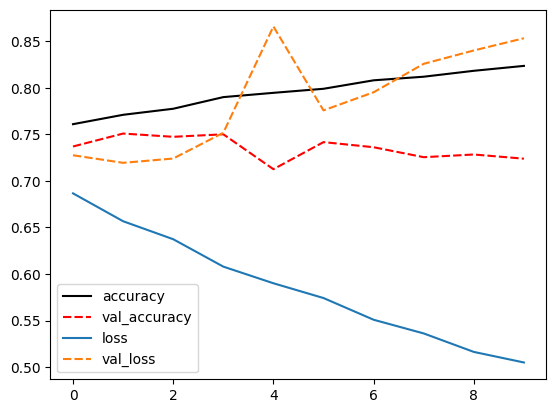

In [16]:
#
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], palette=['black','red'])
sns.lineplot(data=history_df[['loss', 'val_loss']])

# Dropout layer to mitigate overfitting in CNNs

In [17]:
def create_dropout_CNN_model():
  inputs = keras.Input(shape=X_train.shape[1:])

  # Encoding mechanism
  conv1 = keras.layers.Conv2D(50, (3,3), activation='relu')(inputs)
  pool1 = keras.layers.MaxPooling2D((2,2))(conv1)
  conv2 = keras.layers.Conv2D(25, (3,3), activation='relu')(pool1)
  pool2 = keras.layers.MaxPooling2D((2,2))(conv2)
  conv3 = keras.layers.Conv2D(10, (3,3), activation='relu')(pool2)
  pool3 = keras.layers.MaxPooling2D((2,2))(conv3)

  # Add dropout (see explanation here: https://carpentries-incubator.github.io/deep-learning-intro/4-advanced-layer-types.html)
  drop1 = keras.layers.Dropout(0.3)(pool2)
  flattened = keras.layers.Flatten()(drop1)
  dense1 = keras.layers.Dense(50, 'relu')(flattened)
  outputs = keras.layers.Dense(10, 'softmax')(dense1)

  # Create model
  model = keras.Model(inputs=inputs, outputs=outputs, name='Dropout_CNN')

  return model

model_dropout = create_dropout_CNN_model()
model_dropout.summary()

Model: "Dropout_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 25)        11275     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 25)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 6, 6, 25)          

In [ ]:
from keras.callbacks import EarlyStopping

ES = EarlyStopping(monitor='val_loss', patience=10)

model_dropout.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=100, verbose=0,
                            callbacks=[ES])

scores = model_dropout.evaluate(X_test, y_test)
print(scores)

In [ ]:
history_df = pd.DataFrame.from_dict(history_dropout.history)
history_df['epoch'] = range(1, len(history_df) + 1)
history_df = history_df.set_index('epoch')

sns.lineplot(data = history_df[['accuracy', 'val_accuracy']], palette=['black','red'])
sns.lineplot(data = history_df[['loss', 'val_loss']])